Дипломный проект

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.figsize'] = [12, 7]

Загрузить файл HR.csv в pandas dataframe

In [2]:
data = pd.read_csv('HR.csv')
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Рассчитать основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [3]:
from scipy import stats
import statistics

In [4]:
column_statistic = {}
column_data = ['satisfaction_level',
             'last_evaluation',
             'number_project',
             'average_montly_hours',
             'time_spend_company',
             'Work_accident',
             'left',
             'promotion_last_5years',
             'department',
             'salary'
            ]
index_data=[]
mean_data=[]
median_data=[]
mode_data=[]
max_data=[]
min_data=[]
pstdev_data=[]
for name in column_data:
    if data[name].dtypes!=object:
        index_data.append(name)
        mean_data.append(statistics.mean(data[name]))
        median_data.append(statistics.median(data[name]))
        try:
            mode_data.append(statistics.mode(data[name]))
        except:
            check={}
            for i in data[name]:
                if i not in check:
                    check[i] = 1
                else:
                    check[i] += 1
            maxp = 0
            mode_duration = None
            for k, v in check.items():
                if maxp < v:
                    maxp = v
                    mode_duration = k
            mode_data.append(mode_duration)
        max_data.append(max(data[name]))
        min_data.append(min(data[name]))
        pstdev_data.append(statistics.pstdev(data[name]))
column_statistic.setdefault('mean', mean_data)
column_statistic.setdefault('median', median_data)
column_statistic.setdefault('mode', mode_data)
column_statistic.setdefault('max', max_data)
column_statistic.setdefault('min', min_data)
column_statistic.setdefault('pstdev', pstdev_data)

[0.2486223626820733,
 0.1711634045107436,
 1.2325512654823438,
 49.94143446256218,
 1.4600875552715114,
 0.3517068274513532,
 0.42590990072709495,
 0.14427665479561314]

In [5]:
statistic_parametres = pd.DataFrame(column_statistic, index=index_data)
statistic_parametres

,mean,median,mode,max,min,pstdev
satisfaction_level,0.612834,0.64,0.10,1.0,0.09,0.248622
last_evaluation,0.716102,0.72,0.55,1.0,0.36,0.171163
number_project,3.803054,4.00,4.00,7.0,2.00,1.232551
average_montly_hours,201.050337,200.00,135.00,310.0,96.00,49.941434
time_spend_company,3.498233,3.00,3.00,10.0,2.00,1.460088
Work_accident,0.144610,0.00,0.00,1.0,0.00,0.351707
left,0.238083,0.00,0.00,1.0,0.00,0.425910
promotion_last_5years,0.021268,0.00,0.00,1.0,0.00,0.144277


In [6]:
data['salary'] = pd.factorize(data.salary)[0] + 1 #поскольку ранговая переменная, то нужно перевести в число

In [7]:
data.tail(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14979,0.09,0.93,6,296,4,0,1,0,technical,2
14980,0.76,0.89,5,238,5,0,1,0,technical,3
14981,0.73,0.93,5,162,4,0,1,0,technical,1
14982,0.38,0.49,2,137,3,0,1,0,technical,2
14983,0.72,0.84,5,257,5,0,1,0,technical,2
14984,0.40,0.56,2,148,3,0,1,0,technical,2
14985,0.91,0.99,5,254,5,0,1,0,technical,2
14986,0.85,0.85,4,247,6,0,1,0,technical,1
14987,0.90,0.70,5,206,4,0,1,0,technical,1
14988,0.46,0.55,2,145,3,0,1,0,technical,1


Рассчитать и визуализировать корреляционную матрицу дляколичественных переменных.
Определить две самые скоррелированные и две наименеескоррелированные переменные.

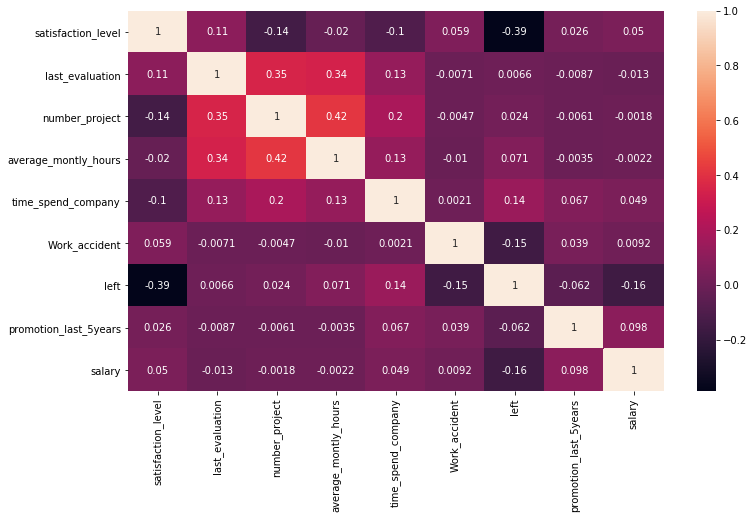

In [8]:
corr_matrix_pearson = data.corr(method='pearson')

sns.heatmap(corr_matrix_pearson, annot=True)

Отрицательная корреляция: 
в данной компании существует отрицательная корреляция между уровем удовлетворенности и уходом сотрудника, а также - между зарплатой и уходом, что очень логично (Гипотезы: сотрудники уходят из-за неудовлетворенности и/или размером з/п). 

Положительная корреляция:
Наблюдается высокий уровень взаимосвязи между средним количеством часов в месяц и номером проекта (наверное, чем выше ранг проекта, тем больше он труднее и сотрудникам необходимо больше часов работать), а также между номером проекта и временем с момента последней оценки в годах

Рассчитайте сколько сотрудников работает в каждом департаменте

In [9]:
def count_uniq_person(data):
    return data.satisfaction_level.count()

In [10]:
#оставим только тех работников, которые не покинули компанию
data_work = data[data.left==0]
data_work.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,1
2001,0.82,0.67,2,202,3,0,0,0,sales,1
2002,0.45,0.69,5,193,3,0,0,0,sales,1
2003,0.78,0.82,5,247,3,0,0,0,sales,1
2004,0.49,0.60,3,214,2,0,0,0,sales,1


In [11]:
print('В департаментах работают : \n', data_work.groupby('department').apply(count_uniq_person))

В департаментах работают : 
 department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
dtype: int64


Больше всего сотрудников работает в отделе продаж - 3126 человек, а меньше всего - в отделе hr - 524 человека

Показать распределение сотрудников по зарплатам

In [12]:
df=data_work.groupby('salary').apply(count_uniq_person)
df=sorted(df, reverse=True)
df

[5144, 5129, 1155]

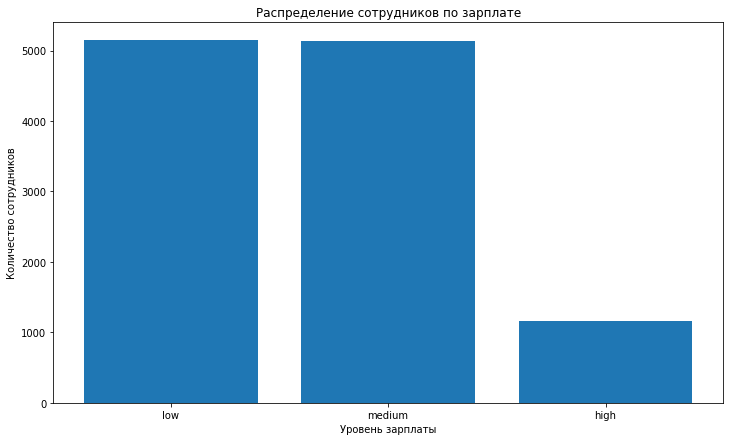

In [13]:
salary_diag=['low', 'medium' ,'high']
plt.bar(salary_diag, df)
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплате')
plt.show()

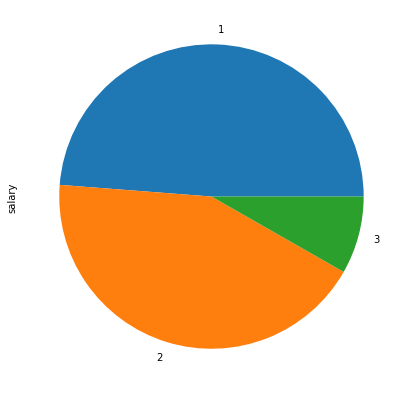

In [14]:
data.salary.value_counts(normalize=True)*100
data.salary.value_counts().plot(kind='pie')

Логично. Больше всего (чуть больше половины) сотрудников  с низкой з/п, потом - со средней, и меньше всех - тех, у кого з/п высокая

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [15]:
dep_data=data_work.groupby(['department','salary']).apply(count_uniq_person).reset_index()
dep_data.columns=['department', 'salary', 'count']
dep_data

,department,salary,count
0,IT,1,437
1,IT,2,438
2,IT,3,79
3,RandD,1,309
4,RandD,2,310
5,RandD,3,47
6,accounting,1,259
7,accounting,2,235
8,accounting,3,69
9,hr,1,243


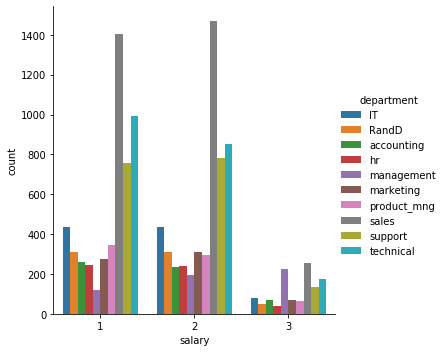

In [16]:
r = dep_data['salary']
f = dep_data['count']
sns.catplot(x='salary', y='count', hue='department', kind='bar', data=dep_data)

Вывод: в некоторых отделах дела обстоят лучше: например, в отделе продаж сотрудников со средним уровнем дохода больше, чем с низким, а в management так вообще - обратная картина по сранению с общей (больше всего сотрудников с высокими з/п, меньше всего -  с низкими з/п)

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [17]:
high_salary = data_work[data_work.salary==3]  #сотрудники с высокой з/п
low_salary = data_work[data_work.salary==1]   #сотрудники с низкой з/п

H0: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
H1: сотрудники с высоким окладом проводят на работе меньше времени, чем сотрудники с низким окладом

In [18]:
alpha = 0.05
result = stats.ttest_ind(high_salary['average_montly_hours'], low_salary['average_montly_hours'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят на работе меньше времени, чем сотрудники с низким окладом')
else:
    print('Не отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')

Ttest_indResult(statistic=1.1462438413562088, pvalue=0.25185710427140806)
Не отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


Гипотеза подтвердилась, t-тест Стьюдента показал, что среднее значение рабочих часов у сотрудников с высокой з/п больше, чем у сотрудников с низкой з/п

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- доля сотрудников с повышением за последние 5 лет
- средняя степень удовлетворенности
- среднее количество проектов

In [19]:
data_left = data[data.left==1]  #датасет уволившихся сотрудников
data_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


In [20]:
#Для сотрудников, которые еще работают

#доля сотрудников с повышением за последние 5 лет
promotion_count_work = data_work[data_work['promotion_last_5years']==1].count()
promotion_count_work
promotion_work = promotion_count_work['promotion_last_5years'] / len(data_work)
print('Доля сотрудников с повышением за последние 5 лет среди тех, кто работает', round(promotion_work*100, 1), '%')

#средняя степень удовлетворенности
satisfaction_work = data_work.satisfaction_level.mean()
print('средняя степень удовлетворенности среди тех, кто работает', round(satisfaction_work*100, 1), '%')

#среднее количество проектов
project_work = data_work.number_project.mean()
print('среднее количество проектов среди тех, кто работает', round(project_work))

Доля сотрудников с повышением за последние 5 лет среди тех, кто работает 2.6 %
средняя степень удовлетворенности среди тех, кто работает 66.7 %
среднее количество проектов среди тех, кто работает 4


In [24]:
len(data_left)

3571

In [25]:
#Для сотрудников, которые уволились

#доля сотрудников с повышением за последние 5 лет
promotion_count_left = data_left[data_left['promotion_last_5years']==1].count()
promotion_left = promotion_count_left['promotion_last_5years'] / len(data_left)
print('Доля сотрудников с повышением за последние 5 лет среди тех, кто уволился', round(promotion_left*100, 1), '%')

#средняя степень удовлетворенности
satisfaction_left = data_left.satisfaction_level.mean()
print('средняя степень удовлетворенности среди тех, кто уволился', round(satisfaction_left*100, 1), '%')


#среднее количество проектов
project_left = data_left.number_project.mean()
print('среднее количество проектов среди тех, кто уволился', round(project_left))

Доля сотрудников с повышением за последние 5 лет среди тех, кто уволился 0.5 %
средняя степень удовлетворенности среди тех, кто уволился 44.0 %
среднее количество проектов среди тех, кто уволился 4


Видно, что степнь удовлетворенности сотрудников, которые уволились на 22,7 п.п. ниже, чем у тех, кто работает, и с повышениями такая же ситуация (сотрудники уходили из-за неудовлетворенности и/или из-за того, что устали ждать повышения)

Разделить данные на тестовую и обучающие выборки. Построить модель LDA, предсказывающую: уволился ли сотрудник на основе имеющихся данных (кроме department и salary). Оценить качество модели на тестовой выборки

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
del data['department']
del data['salary']

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [28]:
data_train, data_test = train_test_split(data, test_size=0.3)
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [30]:
lda = LinearDiscriminantAnalysis()

In [31]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [32]:
lda.predict(data_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, lda.predict(data_test))

0.7684444444444445

Модель так себе работает, точность предсказаний составляет 76,8%. Наверное, з/п - важный критерий для принятия решения о продолжение карьеры вне данной компании